In [3]:
import os
import pandas as pd
import numpy as np
import ipywidgets as widgets
from bqplot import *
import json

pd.options.display.max_columns = 999
import qgrid


TypeError: register() missing 1 required positional argument: 'widget'

In [4]:
# load data
current_directory = os.getcwd()
path_tracking = os.path.join(os.path.join(os.path.dirname(current_directory),'data'),"tracking_set_0")
print(path_tracking)
game_id = 1

path_events = os.path.join(os.path.join(os.path.dirname(current_directory),'data'),"first_10_events")
print(path_events)

# load the tracking data
df_tracking = pd.read_parquet(f'{path_tracking}/{game_id}_tracking.parquet')

# load event names
path_event_csv = os.path.join(os.path.dirname(current_directory),'data')
df_event_names = pd.read_csv(os.path.join(path_event_csv,'event_names.csv'))
dict_event_names = df_event_names.set_index('event_type_id').to_dict()['event_description']

c:\Users\Gabriel\OneDrive\Escritorio\SportsAnalyticsCourse\OptaForum\OptaChallenge_Clustering_Player_Styles\data\tracking_set_0
c:\Users\Gabriel\OneDrive\Escritorio\SportsAnalyticsCourse\OptaForum\OptaChallenge_Clustering_Player_Styles\data\first_10_events


In [5]:
display(df_tracking)
display(df_tracking.groupby('player_id').size().reset_index(name='counts'))

,current_phase,timeelapsed,team_id_opta,player_id,jersey_no,pos_x,pos_y,speed,frame_count,team_id,acc,speed_x,speed_y,dop,team_in_possession
0,1,0.00,bx0cdmzr2gwr70ez72dorx82p,azuc3tma44xyrbgf5y279o1xx,16.0,-19.477912,4.240699,0.464332,10000,2.0,0.727075,-0.121969,-0.357286,L,bx0cdmzr2gwr70ez72dorx82p
1,1,0.00,bx0cdmzr2gwr70ez72dorx82p,6u2ob6fv950r1qve8uejkq2uh,1.0,-0.117343,-0.234231,0.328293,10000,2.0,0.899067,0.224221,0.126503,L,bx0cdmzr2gwr70ez72dorx82p
2,1,0.00,bx0cdmzr2gwr70ez72dorx82p,7cp51c8zn7y08iyk0hc9ix5nt,5.0,-18.723356,-5.825823,0.288777,10000,2.0,0.587134,-0.227203,0.043110,L,bx0cdmzr2gwr70ez72dorx82p
3,1,0.00,bx0cdmzr2gwr70ez72dorx82p,4u281v53ges3kimtgac0tidm2,23.0,-10.883792,-22.826129,0.701829,10000,2.0,0.970594,-0.494652,-0.291488,L,bx0cdmzr2gwr70ez72dorx82p
4,1,0.00,bx0cdmzr2gwr70ez72dorx82p,7sep6mx2s67mh5fr3raxu7aei,13.0,-13.766865,22.911554,0.666157,10000,2.0,1.217318,0.533158,-0.085514,L,bx0cdmzr2gwr70ez72dorx82p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3264394,2,2911.48,bx0cdmzr2gwr70ez72dorx82p,e3kdoxu1kwn2w3wwi1rqhvr9x,17.0,35.991676,3.799364,0.926007,172787,2.0,-1.878056,-0.424699,0.603579,R,None
3264395,2,2911.48,bx0cdmzr2gwr70ez72dorx82p,dxb1r4gqgxkngb0pzvfby9iol,8.0,32.494979,3.601030,0.908475,172787,2.0,-2.052384,-0.313322,-0.646645,R,None
3264396,2,2911.48,3c3jcs7vc1t6vz5lev162jyv7,2lvit204llltk13iglsa2tjah,9.0,31.628743,7.415518,1.056383,172787,1.0,-2.226238,-0.810361,-0.219511,L,None
3264397,2,2911.48,bx0cdmzr2gwr70ez72dorx82p,4u281v53ges3kimtgac0tidm2,23.0,43.108035,3.173653,0.485593,172787,2.0,-0.879399,-0.278471,-0.271117,R,None


,player_id,counts
0,2lvit204llltk13iglsa2tjah,27808
1,3sc349yey596xp2j6xlyt0frp,141928
2,3vx94h32ahujciraspdayj9t6,93593
3,4u281v53ges3kimtgac0tidm2,141928
4,5ak9fwtqlr2pll0nsv5br7p7u,57383
5,5qgc6zjc38a5xjl35gs7h3vu1,102168
6,6ekdnbnk56xlxforb5owt3dn9,141928
7,6j0ogojh2b7poyceg7i3k09yi,141928
8,6u2ob6fv950r1qve8uejkq2uh,141928
9,72d5uxwcmvhd6mzthxuvev1sl,141928


Maximum and mean acceleration and speed

In [6]:
acc_vel = df_tracking.groupby('player_id').agg({'acc': ['mean', 'max'], 'speed': ['mean', 'max']}).reset_index()
acc_vel.columns = ['player_id', 'acc_mean', 'acc_max', 'speed_mean', 'speed_max']
display(acc_vel)

,player_id,acc_mean,acc_max,speed_mean,speed_max
0,2lvit204llltk13iglsa2tjah,-0.001197,5.044720,1.903511,7.592074
1,3sc349yey596xp2j6xlyt0frp,0.000115,7.765589,2.017777,9.674445
2,3vx94h32ahujciraspdayj9t6,0.000241,6.538401,2.328649,9.112478
3,4u281v53ges3kimtgac0tidm2,-0.000060,8.006343,2.002387,8.859887
4,5ak9fwtqlr2pll0nsv5br7p7u,-0.000514,7.038541,2.223043,8.654497
5,5qgc6zjc38a5xjl35gs7h3vu1,-0.000415,7.981123,1.996893,9.851820
6,6ekdnbnk56xlxforb5owt3dn9,-0.000165,7.034281,0.801903,7.699654
7,6j0ogojh2b7poyceg7i3k09yi,0.000683,7.717428,2.070723,9.361088
8,6u2ob6fv950r1qve8uejkq2uh,0.000336,6.782228,2.030733,9.344707
9,72d5uxwcmvhd6mzthxuvev1sl,0.000237,7.571996,1.770559,8.034223


Get position of the players
- 'pos_x': x-coordinate on the pitch; pitch coordinates in [-52.5, 52.5]
- 'pos_y': y-coordinate on the pitch; pitch coordinates in [-34, 34]
- Hem dividit el camp primer en dos (pel mig del camp)
- Després de la zona d'atac: left_wing, right_wing, center down, center up

In [5]:
df_pos = df_tracking[['player_id','pos_x','pos_y','dop']]

# All with the same direction
df_pos['pos_x'] = pd.to_numeric(df_pos['pos_x'])
df_pos['pos_y'] = pd.to_numeric(df_pos['pos_y'])
mask = df_pos['dop'] == 'R'
df_pos.loc[mask, 'dop'] = 'L'
df_pos.loc[mask, 'pos_x'] *= -1
df_pos.loc[mask, 'pos_y'] *= -1

# Divide the field into zones

# Into two zones
df_pos['ofensive'] = np.where(df_pos['pos_x'] > 0, 1, 0)
df_pos['defensive'] = np.where(df_pos['pos_x'] <= 0, 1, 0)

# More especific
df_pos['left_wing'] = np.where((df_pos['pos_x'] > 0) & (-34 <= df_pos['pos_y']) & (df_pos['pos_y'] < -11), 1, 0)
df_pos['right_wing'] = np.where((df_pos['pos_x'] > 0) & (11 < df_pos['pos_y']) & (df_pos['pos_y'] <= 34), 1, 0)
df_pos['center_down'] = np.where((df_pos['pos_x'] > 0) & (df_pos['pos_x'] <= 26.25) & (-11 <= df_pos['pos_y']) & (df_pos['pos_y'] <= 11), 1, 0)
df_pos['center_up'] = np.where((26.25 < df_pos['pos_x']) & (df_pos['pos_x'] <= 52.5) & (-11 <= df_pos['pos_y']) & (df_pos['pos_y'] <= 11), 1, 0)

pos_total = df_pos.groupby('player_id').agg({'ofensive': 'sum', 'defensive': 'sum',
                                             'left_wing': 'sum','right_wing': 'sum',
                                             'center_up': 'sum','center_down': 'sum'}).reset_index()

pos_total = pd.merge(pos_total, df_pos.groupby('player_id').size().reset_index(name='total'),
                      on='player_id', how='inner')
display(pos_total)

pos_total['ofensive %'] = pos_total['ofensive'] / pos_total['total']
pos_total['defensive %'] = pos_total['defensive'] / pos_total['total']
pos_total['left_wing %'] = pos_total['left_wing'] / pos_total['total']
pos_total['right_wing %'] = pos_total['right_wing'] / pos_total['total']
pos_total['center_up %'] = pos_total['center_up'] / pos_total['total']
pos_total['center_down %'] = pos_total['center_down'] / pos_total['total']

pos_pct_total = pos_total[['player_id','ofensive %','defensive %','left_wing %','right_wing %','center_up %','center_down %']]

display(pos_pct_total)





C:\Users\Gabriel\AppData\Local\Temp\ipykernel_2988\2852242655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['pos_x'] = pd.to_numeric(df_pos['pos_x'])
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_2988\2852242655.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['pos_y'] = pd.to_numeric(df_pos['pos_y'])
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_2988\2852242655.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,player_id,ofensive,defensive,left_wing,right_wing,center_up,center_down,total
0,2lvit204llltk13iglsa2tjah,14095,13713,763,2675,1942,8715,27808
1,3sc349yey596xp2j6xlyt0frp,29314,112614,0,22624,2445,3609,141928
2,3vx94h32ahujciraspdayj9t6,53571,40022,16754,12213,8948,15392,93593
3,4u281v53ges3kimtgac0tidm2,56153,85775,28263,7447,5527,14463,141928
4,5ak9fwtqlr2pll0nsv5br7p7u,43459,13924,13205,14709,7266,7764,57383
5,5qgc6zjc38a5xjl35gs7h3vu1,77368,24800,9183,38268,11428,17147,102168
6,6ekdnbnk56xlxforb5owt3dn9,1012,140916,148,464,222,178,141928
7,6j0ogojh2b7poyceg7i3k09yi,78514,63414,4817,26865,13569,33022,141928
8,6u2ob6fv950r1qve8uejkq2uh,106370,35558,5826,56625,17910,25699,141928
9,72d5uxwcmvhd6mzthxuvev1sl,11681,130247,3021,1288,1757,5615,141928


,player_id,ofensive %,defensive %,left_wing %,right_wing %,center_up %,center_down %
0,2lvit204llltk13iglsa2tjah,0.506869,0.493131,0.027438,0.096195,0.069836,0.313399
1,3sc349yey596xp2j6xlyt0frp,0.206541,0.793459,0.000000,0.159405,0.017227,0.025428
2,3vx94h32ahujciraspdayj9t6,0.572383,0.427617,0.179009,0.130491,0.095605,0.164457
3,4u281v53ges3kimtgac0tidm2,0.395644,0.604356,0.199136,0.052470,0.038942,0.101904
4,5ak9fwtqlr2pll0nsv5br7p7u,0.757350,0.242650,0.230120,0.256330,0.126623,0.135301
5,5qgc6zjc38a5xjl35gs7h3vu1,0.757263,0.242737,0.089881,0.374560,0.111855,0.167831
6,6ekdnbnk56xlxforb5owt3dn9,0.007130,0.992870,0.001043,0.003269,0.001564,0.001254
7,6j0ogojh2b7poyceg7i3k09yi,0.553196,0.446804,0.033940,0.189286,0.095605,0.232667
8,6u2ob6fv950r1qve8uejkq2uh,0.749465,0.250535,0.041049,0.398970,0.126191,0.181071
9,72d5uxwcmvhd6mzthxuvev1sl,0.082302,0.917698,0.021285,0.009075,0.012380,0.039562


In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc, Ellipse
def draw_pitch(
  ax, 
  color='black', 
  lw=1, 
  player_pct = None,
  player_pos = None
):
   """
   Matplotlib implementation of a pitch
   Parameters
   ---------
   ax: axes object
   (default: ``matplotlib.pyplot.gca()``) A matplotlib axes object
   color: str
   (default: 'black') Colour of the drawn pitch
   lw: int
   (default: 1) Linewidth of the plotted lines
   Returns
   ---------
   axes object
     A matplotlib axes object containing the pitch lines
   Example
   ---------
   To plot this pitch, include the following commands in your notebook.
   Note: they have to be in this order to plot!
   >>> plt.figure(figsize=(12*1.05,12*0.68),frameon=False)
   >>> opta.draw_pitch()
   >>> plt.xlim(-10,110)
   >>> plt.ylim(-10,110)
   >>> plt.show()
   Then add your mapping on top (e.g. plt.scatter)
   """

   LINE_WD = lw
   PITCH_MIN_X = -52.5
   PITCH_MAX_X = 52.5
   PITCH_MIN_Y = -34
   PITCH_MAX_Y = 34

   # Sidelines
   ax.plot([PITCH_MIN_X, PITCH_MIN_X], [PITCH_MIN_Y, PITCH_MAX_Y], color, lw=LINE_WD)
   ax.plot([PITCH_MAX_X, PITCH_MAX_X], [PITCH_MIN_Y, PITCH_MAX_Y], color, lw=LINE_WD)
   ax.plot([PITCH_MIN_X, PITCH_MAX_X], [PITCH_MIN_Y, PITCH_MIN_Y], color, lw=LINE_WD)
   ax.plot([PITCH_MIN_X, PITCH_MAX_X], [PITCH_MAX_Y, PITCH_MAX_Y], color, lw=LINE_WD)

   # half way line
   ax.plot([0, 0], [PITCH_MIN_Y, PITCH_MAX_Y], color, lw=LINE_WD)

   # Penalty areas
   ax.plot([PITCH_MIN_X, PITCH_MIN_X + 16.15], [-20.15, -20.15], color, lw=LINE_WD)
   ax.plot([PITCH_MIN_X, PITCH_MIN_X + 16.15], [20.15, 20.15], color, lw=LINE_WD)
   ax.plot([PITCH_MIN_X + 16.15, PITCH_MIN_X + 16.15], [-20.15, 20.15], color, lw=LINE_WD)
   ax.plot([PITCH_MAX_X, PITCH_MAX_X - 16.15], [-20.15, -20.15], color, lw=LINE_WD)
   ax.plot([PITCH_MAX_X, PITCH_MAX_X - 16.15], [20.15, 20.15], color, lw=LINE_WD)
   ax.plot([PITCH_MAX_X - 16.15, PITCH_MAX_X - 16.15], [-20.15, 20.15], color, lw=LINE_WD)

   # Goal areas
   ax.plot([PITCH_MIN_X, PITCH_MIN_X + 5.50], [9.16, 9.16], color, lw=LINE_WD)
   ax.plot([PITCH_MIN_X, PITCH_MIN_X + 5.50], [-9.16, -9.16], color, lw=LINE_WD)
   ax.plot([PITCH_MIN_X + 5.50, PITCH_MIN_X + 5.50], [-9.16, 9.16], color, lw=LINE_WD)

   ax.plot([PITCH_MAX_X, PITCH_MAX_X - 5.50], [9.16, 9.16], color, lw=LINE_WD)
   ax.plot([PITCH_MAX_X, PITCH_MAX_X - 5.50], [-9.16, -9.16], color, lw=LINE_WD)
   ax.plot([PITCH_MAX_X - 5.50, PITCH_MAX_X - 5.50], [-9.16, 9.16], color, lw=LINE_WD)

   # Penalty spot
   ax.add_artist(Circle((PITCH_MIN_X + 11, 0), .5, color=color, lw=LINE_WD))
   ax.add_artist(Circle((PITCH_MAX_X - 11, 0), .5, color=color, lw=LINE_WD))

   # Goals
   ax.plot([PITCH_MAX_X, PITCH_MAX_X], [3.66, -3.66], color, lw=4)
   ax.plot([PITCH_MIN_X, PITCH_MIN_X], [3.66, -3.66], color, lw=4)

   # Centre circle
   ax.add_artist(Circle((0, 0), 9.15, color=color, fill=False, lw=LINE_WD))
   ax.add_artist(Circle((0, 0), .5, color=color, lw=LINE_WD))
   
   # Zones
   leftwing = plt.Rectangle((0, -34), 52.5, 23, color='red', alpha=player_pct['left_wing %'].values[0])
   rightwing = plt.Rectangle((0, 11), 52.5, 23, color='red', alpha=player_pct['right_wing %'].values[0])
   centerup = plt.Rectangle((26.25, -11), 26.25, 22, color='red', alpha=player_pct['center_up %'].values[0])
   centerdown = plt.Rectangle((0, -11), 26.25, 22, color='red', alpha=player_pct['center_down %'].values[0])
   defensive = plt.Rectangle((-52.5,-34), 52.5, 68, color='red', alpha=player_pct['defensive %'].values[0])
   ax.add_patch(leftwing)
   ax.add_patch(rightwing)
   ax.add_patch(centerup)
   ax.add_patch(centerdown)
   ax.add_patch(defensive)

   bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="black", lw=1)

   ax.text(0 + 52.5 / 2, -34 + 23 / 2, '{:.2%}'.format(player_pct['left_wing %'].values[0]), ha='center', va='center', color='black', fontsize=12, fontweight='bold',bbox=bbox_props)
   ax.text(0 + 52.5 / 2, 11 + 23 / 2, '{:.2%}'.format(player_pct['right_wing %'].values[0]), ha='center', va='center', color='black', fontsize=12, fontweight='bold',bbox=bbox_props)
   ax.text(26.25 + 26.25 / 2, -11 + 22 / 2, '{:.2%}'.format(player_pct['center_up %'].values[0]), ha='center', va='center', color='black', fontsize=12, fontweight='bold',bbox=bbox_props)
   ax.text(0 + 26.25 / 2, -11 + 22 / 2, '{:.2%}'.format(player_pct['center_down %'].values[0]), ha='center', va='center', color='black', fontsize=12, fontweight='bold',bbox=bbox_props)
   ax.text(-52.5 + 52.5 / 2, -34 + 68 / 2, '{:.2%}'.format(player_pct['defensive %'].values[0]), ha='center', va='center', color='black', fontsize=12, fontweight='bold',bbox=bbox_props)
   
   ax.scatter(player_pos['pos_x'], player_pos['pos_y'], color='black', marker='o',alpha=0.05)

   ##### new
   ax.add_artist(Arc((PITCH_MIN_X + 11, 0),
                 width=9.15 * 2, height=9.15 * 2, theta1=-55, theta2=55, linewidth=LINE_WD,
                 color=color, fill=False))
   ax.add_artist(Arc((PITCH_MAX_X - 11, 0),
                 width=9.15 * 2, height=9.15 * 2, theta1=124, theta2=236, linewidth=LINE_WD,
                 color=color, fill=False))

   ax.add_artist(Arc((PITCH_MIN_X, PITCH_MAX_Y),
                 width=2, height=2, theta1=-90, theta2=0,
                 linewidth=LINE_WD, color=color, fill=False))
   ax.add_artist(Arc((PITCH_MAX_X, PITCH_MAX_Y),
                 width=2, height=2, theta1=180, theta2=270,
                 linewidth=LINE_WD, color=color, fill=False))
   ax.add_artist(Arc((PITCH_MIN_X, PITCH_MIN_Y),
                 width=2, height=2, theta1=0, theta2=90,
                 linewidth=LINE_WD, color=color, fill=False))
   ax.add_artist(Arc((PITCH_MAX_X, PITCH_MIN_Y),
                 width=2, height=2, theta1=90, theta2=180,
                 linewidth=LINE_WD, color=color, fill=False))
   

Plot mapa de calor d'un jugador: e3kdoxu1kwn2w3wwi1rqhvr9x

In [7]:
player_pct = pos_pct_total[pos_pct_total['player_id']=='e3kdoxu1kwn2w3wwi1rqhvr9x']
player_pos = df_pos[df_pos['player_id']=='e3kdoxu1kwn2w3wwi1rqhvr9x']
display(player_pct)
display(player_pos)
player_pos_decimated = player_pos.iloc[::30, :]
player_pos_decimated = player_pos_decimated[player_pos_decimated['pos_x']<52.5]
print(player_pos_decimated.shape)


,player_id,ofensive %,defensive %,left_wing %,right_wing %,center_up %,center_down %
27,e3kdoxu1kwn2w3wwi1rqhvr9x,0.873076,0.126924,0.125423,0.115537,0.306409,0.323981


,player_id,pos_x,pos_y,dop,ofensive,defensive,left_wing,right_wing,center_down,center_up
5,e3kdoxu1kwn2w3wwi1rqhvr9x,-0.714346,14.097450,L,0,1,0,0,0,0
32,e3kdoxu1kwn2w3wwi1rqhvr9x,-0.673846,14.132950,L,0,1,0,0,0,0
55,e3kdoxu1kwn2w3wwi1rqhvr9x,-0.626626,14.172772,L,0,1,0,0,0,0
71,e3kdoxu1kwn2w3wwi1rqhvr9x,-0.572831,14.216308,L,0,1,0,0,0,0
93,e3kdoxu1kwn2w3wwi1rqhvr9x,-0.512775,14.262812,L,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3264306,e3kdoxu1kwn2w3wwi1rqhvr9x,-36.084948,-3.668226,L,0,1,0,0,0,0
3264319,e3kdoxu1kwn2w3wwi1rqhvr9x,-36.056995,-3.707238,L,0,1,0,0,0,0
3264332,e3kdoxu1kwn2w3wwi1rqhvr9x,-36.032048,-3.742237,L,0,1,0,0,0,0
3264376,e3kdoxu1kwn2w3wwi1rqhvr9x,-36.010263,-3.772991,L,0,1,0,0,0,0


(4718, 10)


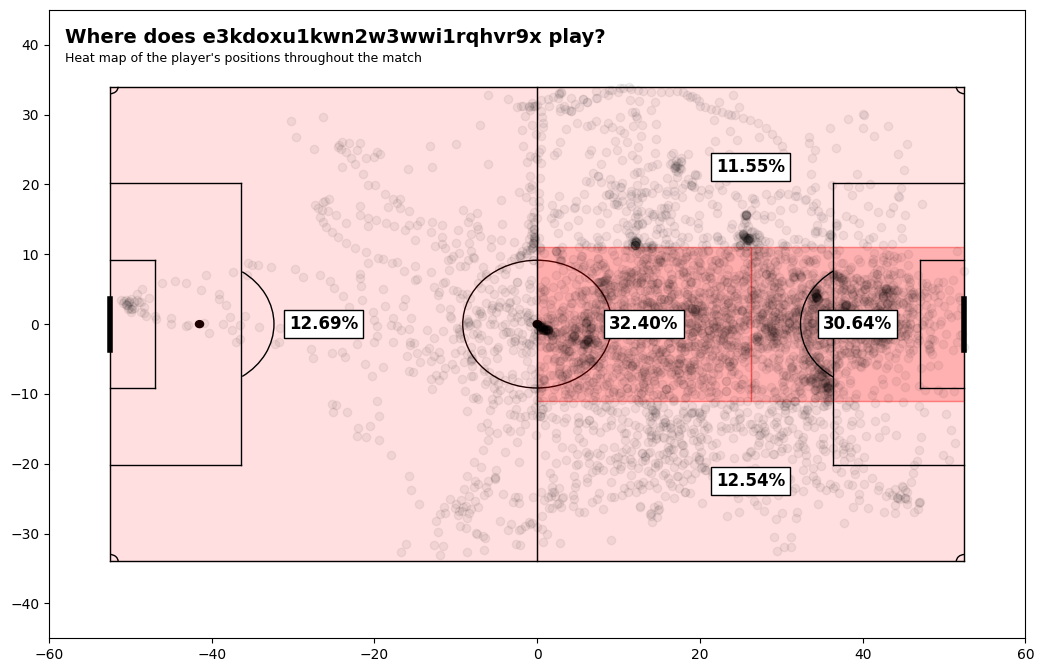

In [8]:
plt.figure(figsize=(12*1.05, 12*0.68), frameon=False, facecolor='white')
draw_pitch(plt.gca(),'black',1,player_pct,player_pos_decimated)

plt.text(-58, 41, 'Where does e3kdoxu1kwn2w3wwi1rqhvr9x play?', color='black', va='center', ha='left', fontsize=14, fontweight='bold')
plt.text(-58, 38, "Heat map of the player's positions throughout the match", color='black', va='center', ha='left', fontsize=9)

plt.xlim(-60, 60)
plt.ylim(-45, 45)


plt.show()

Distance covered

In [15]:
df_pos = df_tracking[['player_id','pos_x','pos_y','dop','timeelapsed']]

# All with the same direction
df_pos['pos_x'] = pd.to_numeric(df_pos['pos_x'])
mask = df_pos['dop'] == 'R'
df_pos.loc[mask, 'dop'] = 'L'
df_pos.loc[mask, 'pos_x'] *= -1

# Get the distance of each pair of points
df_pos = df_pos.sort_values(by=['player_id', 'timeelapsed'])
df_pos['delta_x'] = df_pos.groupby('player_id')['pos_x'].diff()
df_pos['delta_y'] = df_pos.groupby('player_id')['pos_y'].diff()
df_pos['distance'] = np.sqrt(df_pos['delta_x']**2 + df_pos['delta_y']**2)
df_pos['distance'] = df_pos['distance'].fillna(0)

df_pos['distance_covered'] = df_pos.groupby('player_id')['distance'].cumsum()

# Max distance covered per player_id
df_pos.groupby('player_id')['distance_covered'].max()


C:\Users\Gabriel\AppData\Local\Temp\ipykernel_20076\1867164024.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['pos_x'] = pd.to_numeric(df_pos['pos_x'])


player_id
2lvit204llltk13iglsa2tjah    2.117430e+03
3sc349yey596xp2j6xlyt0frp    6.301341e+06
3vx94h32ahujciraspdayj9t6    1.763539e+06
4u281v53ges3kimtgac0tidm2    4.084217e+06
5ak9fwtqlr2pll0nsv5br7p7u    5.102619e+03
5qgc6zjc38a5xjl35gs7h3vu1    2.295105e+06
6ekdnbnk56xlxforb5owt3dn9    1.275723e+06
6j0ogojh2b7poyceg7i3k09yi    4.238689e+06
6u2ob6fv950r1qve8uejkq2uh    4.667161e+06
72d5uxwcmvhd6mzthxuvev1sl    3.158943e+06
7cp51c8zn7y08iyk0hc9ix5nt    3.866538e+06
7k0r5crdh9blj3edt31zwy0dm    2.958826e+03
7sep6mx2s67mh5fr3raxu7aei    5.829507e+03
7ty1wdxxnusgkl34k5raipbl5    1.432234e+03
8f3bhiy6r5eei1n25exhbwr8p    5.599021e+03
8gkexxgf3pypshhqwg6ibp7o4    3.974316e+06
8qmm84tue6kuz8e5nhhdhmz8p    4.311887e+06
96wcx761pzv5ub4sfwsynp51x    3.799735e+06
976riwm0dz0e74d4l28y3ttcl    4.109360e+06
a56woizbe4g6jpl3fg4tlgno5    1.302982e+06
aaaaaaaaaaaaaaaaaaaaaaaaa    6.641350e+06
afymbx9eo87zau8mo99pakbu     5.397791e+06
agwvouyocx93y39g7tmwaojx1    3.634731e+03
azuc3tma44xyrbgf5y279o1x